<div align="center">

### **FINAL PROJECT - SIGNALS AND SYSTEMS - 2025 2S**
#### **Group members:** Martín Ramírez Espinosa, Valeria Corredor García
##### Department of Electrical, Electronic and Computer Engineering
##### National University of Colombia - Manizales Campus

</div>

---


### **FIR and IIR filters from first principles**

### Discrete-time LTI systems
- A discrete-time signal is a sequence $x[n]$ with $n \in \mathbb{Z}$. A system $T$ maps $x[n] \mapsto y[n]$.
- **Linearity**: $T(a x_1 + b x_2) = a T(x_1) + b T(x_2)$; **time invariance**: $T\{x[n-n_0]\} = y[n-n_0]$. When both hold, the system is LTI.
- The response to the unit impulse $\delta[n]$ is $h[n] = T\{\delta[n]\}$. By linearity and time invariance, any input decomposed as $x[n] = \sum_k x[k] \, \delta[n-k]$ produces
  $$y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k] = (h * x)[n].$$
  This convolution expression completely characterizes an LTI system.
- **BIBO stability**: $\sup_n |x[n]| < \infty \Rightarrow \sup_n |y[n]| < \infty$. For LTI systems this holds iff $\sum_n |h[n]| < \infty$.

### Z-transform and system function
- The bilateral Z-transform of $x[n]$ is $X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n}$, defined on a region of convergence (ROC) in the complex plane.
- Convolution property: if $y[n] = (h * x)[n]$, then $Y(z) = H(z) \, X(z)$, where $H(z) = \sum_n h[n] z^{-n}$ is the **system function** (transfer function). Poles/zeros of $H(z)$ plus the ROC specify the LTI system.
- For causal, linear, shift-invariant digital filters implemented by constant-coefficient difference equations, $H(z)$ is rational:
  $$H(z) = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}},$$
  where $M, N$ are feedforward and feedback orders.
- **Frequency response** is obtained on the unit circle $z = e^{j\omega}$: $H(e^{j\omega}) = H(z)|_{z=e^{j\omega}}$. Magnitude $|H(e^{j\omega})|$ and phase $\angle H(e^{j\omega})$ describe spectral shaping.
- **Stability** for causal rational $H(z)$: all poles must lie strictly inside the unit circle ($|p_i| < 1$), ensuring absolute summability of $h[n]$.

### FIR filters
- Definition: finite impulse response $h[n]$ has finite support: $h[n] = 0$ for $n \notin \{0,\dots,M\}$. Therefore $H(z) = \sum_{k=0}^{M} b_k z^{-k}$ is a polynomial; poles only at $z = 0$ with multiplicity $M$ (strictly inside unit circle) so causal FIR filters are always BIBO-stable.
- Implementation is the nonrecursive difference equation $y[n] = \sum_{k=0}^{M} b_k x[n-k]$. Output depends on a finite set of past inputs; no dependence on past outputs, hence the impulse response ends after $M$ samples.
- **Phase**: By choosing symmetric ($b_k = b_{M-k}$) or antisymmetric ($b_k = -b_{M-k}$) coefficients, FIR filters achieve exact linear phase: $H(e^{j\omega}) = A(\omega) \, e^{-j\omega M/2}$ with constant group delay $\tau_g = M/2$, implying no waveform distortion aside from delay. Zero-phase magnitude filtering can be achieved by forward-backward application (e.g., `filtfilt`), yielding $|H(e^{j\omega})|^2$ magnitude and cancelled phase.
- Trade-offs: FIR filters require higher order than IIR to achieve the same transition sharpness, increasing delay and computation, but they allow precise control of magnitude and phase.

### IIR filters
- Definition: infinite impulse response arises when the system has feedback ($a_k \neq 0$). The difference equation
  $$y[n] = -\sum_{k=1}^{N} a_k \, y[n-k] + \sum_{k=0}^{M} b_k \, x[n-k]$$
  yields $h[n]$ that typically decays but never reaches exact zero.
- Transfer function is rational with denominator $1 + \sum_{k=1}^{N} a_k z^{-k}$; poles are its roots. Stability requires all poles inside the unit circle; otherwise $h[n]$ is not absolutely summable and the system is unstable.
- **Phase**: Generic IIR designs have nonlinear phase; group delay varies with $\omega$, causing waveform distortion. Phase linearization is possible via all-pass phase equalizers or by using zero-phase (forward-backward) processing at the cost of noncausality and doubled magnitude response.
- Advantages: For a given specification (transition width, ripple, attenuation), IIR filters need much lower order than FIR, yielding shorter latency and fewer computations. Risks include potential instability (especially under coefficient quantization) and phase distortion for causal operation.

### Filter specifications (digital domain)
- Key requirements are expressed on the unit circle:
  - Passband and stopband edge frequencies ($\omega_{p}, \omega_{s}$) or in Hz relative to sampling rate $f_s$ via $\omega = 2\pi f / f_s$.
  - Allowed passband ripple $\delta_p$ (e.g., $0.5$ dB) and required stopband attenuation $\delta_s$ (e.g., $40$ dB).
  - Transition bandwidth $\Delta \omega = \omega_s - \omega_p$.
  - Phase requirements: linear phase (constant group delay), zero-phase (noncausal but distortionless magnitude), or tolerable nonlinear phase.
  - Stability (poles inside unit circle) and causality (ROC exterior to outermost pole for right-sided sequences).

### FIR design methods
- **Window method**: start from ideal impulse response (e.g., sinc for low-pass), truncate with a window (Hamming, Blackman) to control sidelobes/transition width. Order roughly scales as $O(\Delta \omega^{-1})$.
- **Frequency sampling / least squares**: specify desired samples of $H(e^{j\omega})$ and solve for coefficients minimizing squared error.
- **Parks-McClellan (equiripple)**: Chebyshev approximation that minimizes maximum error over bands, producing optimal (in $L_\infty$ sense) linear-phase FIR for given order and band edges; used when ripple/attenuation are specified.
- **Multirate or polyphase structures** for efficient implementation of filter banks used in MI feature extraction.

### IIR design methods
- **Analog prototype + bilinear transform (BLT)**: design analog low-pass prototype (Butterworth: maximally flat; Chebyshev I: passband ripple; Chebyshev II: stopband ripple; elliptic: ripple in both, steepest transition), prewarp band edges to compensate BLT frequency warping, transform to band-pass/stop/high-pass, then map $s$-plane to $z$-plane via $s = \frac{2}{T} \frac{1 - z^{-1}}{1 + z^{-1}}$. Poles inside the left half-plane map inside the unit circle, preserving stability.
- **Impulse invariance / matched-$z$**: map analog poles directly ($z_k = e^{p_k T}$) to preserve impulse response shape (with possible aliasing for high frequencies).
- **Direct digital optimization**: constrain poles inside unit circle and solve for coefficients to meet magnitude/phase specs (e.g., convex optimization for IIR magnitude-squared response).
- Implementation forms (direct form II transposed, cascade biquads) help with numerical robustness; monitor pole radius after quantization to maintain stability.

### Application to EEG motor imagery (MI) preprocessing
- Goal: enhance task-related spectral rhythms (mu $8$–$13$ Hz over sensorimotor cortex; beta $13$–$30$ Hz) and suppress noise/artefacts (DC drift, muscle $> 30$–$40$ Hz, line noise $50/60$ Hz). Filtering improves temporal/spectral SNR and the spatial filters learned downstream (e.g., CSP, Riemannian features).
- **Typical temporal filtering strategy**:
  - High-pass or band-pass to remove DC/slow drift: e.g., FIR linear-phase band-pass $0.5$–$2$ Hz to $40$ Hz, or IIR Butterworth band-pass $8$–$30$ Hz for MI-specific rhythms when task segments are short.
  - Notch (band-stop) at $50/60$ Hz: often 2nd-order IIR (biquad) with tight stopband; ensure poles remain well inside unit circle (radius $< 0.99$) to avoid ringing. Zero-phase by forward-backward filtering offline to avoid phase distortion of ERD/ERS timing.
  - Filter banks (FIR or IIR) for FBCSP: multiple adjacent sub-bands (e.g., 4-Hz wide from $4$–$40$ Hz) designed with equiripple FIR (linear phase) or low-order IIR biquads; concatenated features capture subject-specific peak frequencies.
- **Spatial considerations**: Temporal filtering is applied per channel before spatial filters. Zero-phase FIR or forward-backward IIR preserves the relative phase between channels, crucial for CSP which relies on covariance structure; nonlinear-phase causal IIR can distort inter-channel phase and reduce spatial filter performance.
- **Order/latency trade-off**: For real-time MI-BCI, low latency is needed. Low-order IIR Butterworth/Chebyshev band-pass yields shorter group delay than high-order FIR; however, if causal operation is required, FIR linear-phase delay ($M/2$ samples) must be budgeted into system latency. Offline analysis can use longer zero-phase FIR to avoid distortion entirely.
- **Stability and numerical safety**: Ensure IIR poles $|p_i| < 1$ after digitization and quantization. Monitor biquad pole radii; choose SOS (second-order sections) implementation to reduce sensitivity. FIR designs are unconditionally stable and easier to implement at high orders.
- **Phase implications**:
  - For ERD/ERS timing, phase distortion can misalign desynchronization with cue onset. Use linear-phase FIR or zero-phase forward-backward IIR/FIR for offline training/testing.
  - If causal real-time filtering is mandatory, prefer near-linear-phase FIR (longer order) or low-order Butterworth (smooth phase) and document group delay so classifier windows align correctly.
- **Specification examples for MI**:
  - Band-pass FIR equiripple: passband $8$–$30$ Hz, stopbands $[0,6]$ and $[32, f_s/2]$, passband ripple $0.5$ dB, stopband attenuation $40$ dB, linear phase; used before CSP.
  - Notch IIR biquad at $50$ Hz: pole radius $r = 0.99$, zeros on unit circle at $e^{\pm j 2\pi 50/f_s}$, ensuring deep notch with narrow bandwidth; check stability via $|p| < 1$.
  - Filter bank of $K$ bands (e.g., $4$–$8$, $8$–$12$, $12$–$16$, ... up to $36$–$40$ Hz) using low-order Butterworth band-pass biquads for low latency online FBCSP.

### Implications for MI-BCI preprocessing
- FIR filters: stable, can be exactly linear or zero-phase, preserving temporal shape and inter-channel phase; suitable for offline training or when latency is tolerable. Higher order increases delay and computation.
- IIR filters: compact order and low latency; risk of phase distortion and instability. Use zero-phase (noncausal) for offline preprocessing or carefully design causal filters with acceptable group delay and pole radii margin for online systems.
- Proper filter design aligns spectral emphasis with MI rhythms, reduces artefacts, and safeguards covariance and phase relationships critical for spatial filters (CSP, Riemannian approaches).

---

**Objective.** Implement time- and frequency-domain representation techniques for recognizing electroencephalography (EEG) signals in motor imagery tasks.

<p align="center"><img src="https://figures.semanticscholar.org/288a54f091264377eccc99a19079c9387d66a78f/3-Figure2-1.png" alt="Motor imagery EEG example" style="max-width:50%; width:50%;"></p>

EEG signals can be noisy due to various sources, including physiological artifacts and electromagnetic interference. They also vary from person to person, which complicates feature extraction and interpretation. Moreover, this variability—shaped by genetic and cognitive factors—poses challenges for developing subject-independent solutions.

**Database:** GiGaScience Database [https://gigadb.org/dataset/100295](https://gigadb.org/dataset/100295)

See Section 3.1 in [Multimodal Explainability Using Class Activation Maps and Canonical Correlation for MI-EEG Deep Learning Classification](https://www.mdpi.com/2076-3417/14/23/11208).


---

**Setup.** Install the necessary libraries.

**Exercise 1.** Investigate the purpose of the following libraries.

**Answer.**
- TensorFlow supplies the deep-learning stack we need (e.g., CNNs/RNNs) to learn left vs. right MI patterns from the EEG once features are prepared.
- MNE provides the EEG-specific plumbing: channel montages, referencing, filtering, epoch handling, and rich visualization utilities.
- Braindecode brings ready-made deep models and utilities tailored to EEG (filter-bank CNNs, dataset wrappers, trial/cue alignment) so we do not have to build architectures from scratch.
- `python-gcpds.databases` is the bridge to the GIGA_MI_ME dataset (metadata, channel selectors, trial retrieval), keeping data access consistent with the course infrastructure.


In [9]:
%%capture
!pip install tensorflow==2.15.0
!pip install mne==1.6.0
!pip install braindecode===0.7
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases


---

**Imports.** Import the required libraries.


In [10]:
from __future__ import annotations

import random
from typing import Optional

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gcpds.databases import GIGA_MI_ME
from scipy.signal import butter as bw
from scipy.signal import filtfilt, freqz, resample
from sklearn.base import BaseEstimator, TransformerMixin

# import tensorflow as tf


**Preprocessing helpers.** Functions needed for light preprocessing of the data.


In [11]:
def load_GIGA(
        db,                             # Dataset interface (GIGA_MI_ME)
        sbj,                            # Subject index
        eeg_ch_names: list[str],        # EEG channel names to select
        new_fs: float,                  # Target sampling frequency [Hz]
        fs: float,                      # Original sampling frequency [Hz]
        f_bank=None,                    # Optional filter bank (placeholder)
        vwt=None,                       # Optional time windows (placeholder)
        run=None                        # Optional run name/number
) -> tuple[np.ndarray, np.ndarray]:
    """Load motor imagery EEG for one subject and optionally resample."""
    index_eeg_chs = db.format_channels_selectors(channels=eeg_ch_names) - 1

    # tf_repr = TimeFrequencyRpr(sfreq = fs, f_bank = f_bank, vwt = vwt)

    db.load_subject(sbj)
    if run == None:
        X, y = db.get_data(
            classes=["left hand mi", "right hand mi"]
        )  # Load MI classes, all channels {EEG}, reject bad trials, uV
    else:
        X, y = db.get_run(
            run, classes=["left hand mi", "right hand mi"]
        )  # Load MI classes, all channels {EEG}, reject bad trials, uV
    X = X[:, index_eeg_chs, :]  # spatial rearrangement
    # X = np.squeeze(tf_repr.transform(X))
    # Resampling
    if new_fs == fs:
        pass  # print('No resampling, since new sampling rate same.')
    else:
        print("Resampling from {:f} to {:f} Hz.".format(fs, new_fs))
        X = resample(X, int((X.shape[-1] / fs) * new_fs), axis=-1)

    return X, y


def butterworth_digital_filter(
    X: np.ndarray,                       # Array with signals
    N: int,                              # Filter order
    Wn,                                  # Critical frequency/frequencies
    btype: str,                          # Type of filter
    fs: float,                           # Sampling frequency of the system
    axis: int = -1,                      # Axis to filter
    padtype=None,                        # Padding strategy
    padlen: int = 0,                     # Padding length
    method: str = "pad",                 # Edge handling method
    irlen=None,                          # Impulse response length
) -> np.ndarray:                         # Filtered signals
    """Apply a digital Butterworth filter."""
    b, a = bw(N, Wn, btype, analog=False, output="ba", fs=fs)
    return filtfilt(
        b, a, X, axis=axis, padtype=padtype, padlen=padlen, method=method, irlen=irlen
    )


class TimeFrequencyRpr(BaseEstimator, TransformerMixin):
    """Time–frequency representation of EEG signals."""

    def __init__(self, sfreq, f_bank=None, vwt=None):
        self.sfreq = sfreq
        self.f_bank = f_bank
        self.vwt = vwt

    # ------------------------------------------------------------------------------
    def _validation_param(self):
        """Validate sampling frequency, filter bank, and window settings."""
        if self.sfreq <= 0:
            raise ValueError("Non negative sampling frequency is accepted")

        if self.f_bank is None:
            self.flag_f_bank = False
        elif self.f_bank.ndim != 2:
            raise ValueError("Band frequencies have to be a 2D array")
        else:
            self.flag_f_bank = True

        if self.vwt is None:
            self.flag_vwt = False
        elif self.vwt.ndim != 2:
            raise ValueError("Time windows have to be a 2D array")
        else:
            self.flag_vwt = True

    # ------------------------------------------------------------------------------
    def _filter_bank(self, X):
        """Apply band-pass filters defined in f_bank."""
        X_f = np.zeros(
            (X.shape[0], X.shape[1], X.shape[2], self.f_bank.shape[0])
        )  # epochs, Ch, Time, bands
        for f in np.arange(self.f_bank.shape[0]):
            X_f[:, :, :, f] = butterworth_digital_filter(
                X, N=5, Wn=self.f_bank[f], btype="bandpass", fs=self.sfreq
            )
        return X_f

    # ------------------------------------------------------------------------------
    def _sliding_windows(self, X):
        """Slice trials into the time windows specified in vwt (cropping to a common length)."""
        starts = (self.sfreq * self.vwt[:, 0]).astype(int)
        ends = (self.sfreq * self.vwt[:, 1]).astype(int)
        lengths = ends - starts
        min_len = lengths.min()

        if not np.all(lengths == min_len):
            warnings.warn(
                f"Windows have different lengths {lengths}; cropping to {min_len} samples for consistency.",
                RuntimeWarning,
            )

        X_w = np.zeros((X.shape[0], X.shape[1], min_len, self.vwt.shape[0]))
        for w, (s, e) in enumerate(zip(starts, ends)):
            X_w[:, :, :, w] = X[:, :, s : s + min_len]
        return X_w

    def fit(self, X, y=None):
        """No-op fit for compatibility with sklearn transformers."""
        return self

    # ------------------------------------------------------------------------------
    def transform(self, X, y=None):
        """Build the time–frequency representation."""
        self._validation_param()  # Validate sfreq, f_freq, vwt

        # Avoid edge effects of digital filter, 1st:fbk, 2th:vwt
        if self.flag_f_bank:
            X_f = self._filter_bank(X)
        else:
            X_f = X[:, :, :, np.newaxis]

        if self.flag_vwt:
            X_wf = []
            for f in range(X_f.shape[3]):
                X_wf.append(self._sliding_windows(X_f[:, :, :, f]))
            X_wf = np.stack(X_wf, axis=-1)
        else:
            X_wf = X_f[:, :, :, np.newaxis, :]

        return X_wf


# plot eeg
def plot_eeg(
        X: np.ndarray,             # EEG trial: channels x samples
        tv: np.ndarray,            # Time vector [s]
        ax,                        # Matplotlib axis to plot on
        channels: list[str],       # Channel labels
        esp: int = 2,              # Vertical spacing between traces
        title: str | None = None   # Optional plot title
) -> None:
    """Plot stacked EEG channels with light normalization for visibility."""
    # X in CH x Samples
    n_channels = X.shape[0]

    for ch in range(n_channels):  # channels
        xx = X[ch]
        xx = xx - np.mean(xx)
        xx = xx / np.max(abs(xx))
        ax.plot(
            tv, xx + (ch * esp), label=channels[ch]
        )  # Offset each channel for visualization
    ax.set_yticks(range(0, esp * n_channels, esp), channels)  # Channel labels on Y-axis
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("EEG channels [uV]")
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlim([min(tv) - 0.01, max(tv) + 0.01])
    ax.set_ylim([-esp, n_channels * esp + 0.01])

**Protocol and montage.** Establish the test protocol and EEG montage configuration. Describe the data acquisition protocol and the montage used.


<p align="center">
<img src="https://www.mdpi.com/diagnostics/diagnostics-13-01122/article_deploy/html/images/diagnostics-13-01122-g001.png" alt="Motor imagery trial structure" style="max-width:50%; width:85%;">
</p>


<p align="center">
<img src="https://www.mdpi.com/applsci/applsci-14-11208/article_deploy/html/images/applsci-14-11208-g001.png" alt="EEG montage diagram" style="max-width:50%; width:85%;">
</p>

In [12]:
# Channel layout and regional groupings for the 10-20 montage
channels = [
    "Fp1",
    "Fpz",
    "Fp2",
    "AF7",
    "AF3",
    "AFz",
    "AF4",
    "AF8",
    "F7",
    "F5",
    "F3",
    "F1",
    "Fz",
    "F2",
    "F4",
    "F6",
    "F8",
    "FT7",
    "FC5",
    "FC3",
    "FC1",
    "FCz",
    "FC2",
    "FC4",
    "FC6",
    "FT8",
    "T7",
    "C5",
    "C3",
    "C1",
    "Cz",
    "C2",
    "C4",
    "C6",
    "T8",
    "TP7",
    "CP5",
    "CP3",
    "CP1",
    "CPz",
    "CP2",
    "CP4",
    "CP6",
    "TP8",
    "P9",
    "P7",
    "P5",
    "P3",
    "P1",
    "Pz",
    "P2",
    "P4",
    "P6",
    "P8",
    "P10",
    "PO7",
    "PO3",
    "POz",
    "PO4",
    "PO8",
    "O1",
    "Oz",
    "O2",
    "Iz",
]

areas = {
    "Frontal": ["Fpz", "AFz", "Fz", "FCz"],
    "Frontal Right": [
        "Fp2",
        "AF4",
        "AF8",
        "F2",
        "F4",
        "F6",
        "F8",
    ],
    "Central Right": [
        "FC2",
        "FC4",
        "FC6",
        "FT8",
        "C2",
        "C4",
        "C6",
        "T8",
        "CP2",
        "CP4",
        "CP6",
        "TP8",
    ],
    "Posterior Right": [
        "P2",
        "P4",
        "P6",
        "P8",
        "P10",
        "PO4",
        "PO8",
        "O2",
    ],
    #'Central': ['Cz'],
    "Posterior": [
        "CPz",
        "Pz",
        "Cz",
        "POz",
        "Oz",
        "Iz",
    ],
    "Posterior Left": [
        "P1",
        "P3",
        "P5",
        "P7",
        "P9",
        "PO3",
        "PO7",
        "O1",
    ],
    "Central Left": [
        "FC1",
        "FC3",
        "FC5",
        "FT7",
        "C1",
        "C3",
        "C5",
        "T7",
        "CP1",
        "CP3",
        "CP5",
        "TP7",
    ],
    "Frontal Left": [
        "Fp1",
        "AF3",
        "AF7",
        "F1",
        "F3",
        "F5",
        "F7",
    ],
}

arcs = [
    #'hemispheres',
    "areas",
    "channels",
]

**Data paths.** Define the path and parameters for loading the EEG data.


In [13]:
db = GIGA_MI_ME("/kaggle/input/giga-science-gcpds/GIGA_MI_ME")
# start_s = 0
# end_s = 7
new_fs = 256.0
load_args = dict(
    db=db,
    eeg_ch_names=channels,
    fs=db.metadata["sampling_rate"],
    # f_bank = np.asarray([[4., 40.]]),
    # vwt = np.asarray([[start_s, end_s]]),
    new_fs=new_fs,
)


**Loading.** Load the data for the desired participant.


In [14]:
sbj = 5
X, y = load_GIGA(sbj=sbj, **load_args)

print(
    f"X with {X.shape[0]} trials; {X.shape[1]} channels; {X.shape[2]} samples; duration (s) {X.shape[2] / new_fs}"
)
X.shape

Resampling from 512.000000 to 256.000000 Hz.
X with 199 trials; 64 channels; 1792 samples; duration (s) 7.0


(199, 64, 1792)

### Cross-subject filter-bank CSP with batch loading
The baseline code loads a single subject. To make motor imagery detection more robust across participants and experimental runs, we iterate through the subject list (per the **Batch loading.** note), normalize each subject, and build a filter-bank + sliding-window CSP stack trained with subject-wise splits so spatial, temporal, and spectral patterns remain comparable across people.


In [34]:
# Cross-subject batch loading and filter-bank CSP evaluation
from mne.decoding import CSP
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Subject list from the database (fallback to first 5 if unavailable)
sbj_list = getattr(db, "subjects", None)
if sbj_list is None:
    sbj_list = list(range(1, 6))
print(f"Using {len(sbj_list)} subjects: {sbj_list}")

# MI-focused bands and cue-locked windows (pre/post event)
f_bank = np.array([[4.0, 8.0], [8.0, 13.0], [13.0, 26.0], [26.0, 35.0]])
vwt = np.array([[0.5, 2.5], [2.0, 4.0], [3.5, 5.5]])  # equal 2.0 s windows
tf_repr = TimeFrequencyRpr(sfreq=new_fs, f_bank=f_bank, vwt=vwt)


def center_scale_trials(X: np.ndarray) -> np.ndarray:
    """Subject-wise centering and scaling to reduce between-subject amplitude drift."""
    X = X - X.mean(axis=2, keepdims=True)
    X = X / (X.std(axis=2, keepdims=True) + 1e-6)
    return X


def load_subject_tf(sbj: int):
    X, y = load_GIGA(sbj=sbj, **load_args)
    X = center_scale_trials(X)
    return np.squeeze(tf_repr.transform(X)), y


# Batch load all subjects and keep track of subject IDs for grouped CV
X_all, y_all, groups = [], [], []
for sbj in sbj_list:
    X_tf, y = load_subject_tf(sbj)
    X_all.append(X_tf)
    y_all.append(y)
    groups.extend([sbj] * len(y))
X_all = np.concatenate(X_all, axis=0)
y_all = np.concatenate(y_all, axis=0)
groups = np.asarray(groups)
print("Time-frequency tensor:", X_all.shape, "labels:", y_all.shape)


class FBCSPFeatures(BaseEstimator, TransformerMixin):
    """Filter-bank CSP over bands and windows with log-variance features."""

    def __init__(self, n_components: int = 2):
        self.n_components = n_components

    def fit(self, X, y):
        self.csp_bank_ = []
        n_bands = X.shape[-1]
        n_windows = X.shape[-2]
        for b in range(n_bands):
            for w in range(n_windows):
                csp = CSP(
                    n_components=self.n_components,
                    log=True,
                    transform_into="average_power",
                )
                csp.fit(X[:, :, :, w, b], y)
                self.csp_bank_.append((b, w, csp))
        return self

    def transform(self, X):
        feats = []
        for b, w, csp in self.csp_bank_:
            feats.append(csp.transform(X[:, :, :, w, b]))
        return np.concatenate(feats, axis=1)


n_splits = max(2, min(5, len(np.unique(groups))))
gkf = GroupKFold(n_splits=n_splits)
clf = Pipeline(
    steps=[
        ("fbcsp", FBCSPFeatures(n_components=2)),
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                max_iter=1000,
                class_weight="balanced",
                solver="lbfgs",
            ),
        ),
    ]
)
scores = cross_val_score(
    clf, X_all, y_all, groups=groups, cv=gkf, scoring="roc_auc"
)
print("Group-wise (subject-held-out) AUC:", scores, "mean=", scores.mean())


Using 5 subjects: [1, 2, 3, 4, 5]
Resampling from 512.000000 to 256.000000 Hz.
Resampling from 512.000000 to 256.000000 Hz.
Resampling from 512.000000 to 256.000000 Hz.
Resampling from 512.000000 to 256.000000 Hz.
Resampling from 512.000000 to 256.000000 Hz.
Time-frequency tensor: (999, 64, 512, 3, 4) labels: (999,)
Group-wise (subject-held-out) AUC: [0.5685     0.5352     0.5478     0.5356     0.75525253] mean= 0.588470505050505


### Difficulties vs. state of the art
- **Spatial inconsistency:** Sensorimotor sources shift across subjects and head geometries; CSP filters estimated on one subject transfer poorly without alignment. Advanced approaches use Riemannian alignment or source imaging to stabilize covariance structure.
- **Spectral variability:** Individual $\mu$/$\beta$ peaks drift (fatigue, medication, electrode impedance). Fixed bands (even with filter banks) may miss subject-specific peaks; adaptive peak-picking or subject-specific AR/PSD models are often used.
- **Temporal jitter:** MI onset and ERD/ERS timing vary by trial/task, so fixed windows can clip informative segments. Sliding windows and data-driven latency estimation (e.g., HMM/temporal attention in CNN/Transformers) address this but require more data.
- **Non-stationary noise:** Muscle, ocular, and line-noise artefacts change per subject/session, perturbing both covariance and spectral estimates. Online recalibration, ICA/SSP, or artifact-aware robust covariance estimation help but increase complexity.
- **Cross-condition generalization:** Left/right MI is confounded by concurrent movements or mixed cues; domain adaptation and meta-learning methods are the state-of-the-art to reduce condition shifts.
The batch filter-bank CSP + grouped CV here reduces some variance (subject-wise normalization, multi-band/multi-window features, subject-held-out validation) but residual inconsistencies remain the main bottleneck highlighted in current MI-BCI literature.


### Physiological and inter-subject variability considerations
- **Physiological artifacts:** Eye blinks/saccades (frontopolar/FP dominance) and facial/neck muscle activity (broadband >30–40 Hz) inflate covariance and can dominate CSP filters. Use EOG/EMG channels for regression or ICA/SSP removal, apply notch and high-pass, and monitor trial-level variance to reject contaminated epochs.
- **State factors (fatigue, attention):** Cognitive state shifts alter baseline $\mu$ (8–12 Hz) and $\beta$ (13–30 Hz) power and ERD depth. Session-wise normalization, sliding windows, and adaptive recalibration reduce leakage of state drift into features.
- **Genetic/trait factors:** Anatomical and neurophysiological differences (cortical folding, myelination, neurotransmitter levels) shape individual $\mu/\beta$ peak frequencies and spatial topographies. Fixed bands risk missing peaks; filter banks plus subject-wise band adaptation or peak picking are common mitigations.
- **Prior experience and strategy:** Motor expertise or imagery strategy (kinesthetic vs visual) modulates spatial foci and timing of ERD/ERS; cross-subject models must tolerate shifts in onset/latency and lateralization strength. Multi-window CSP and subject-held-out validation used here explicitly test for transfer under these shifts.
- **Implication for the pipeline:** The batch filter-bank + sliding-window CSP with per-subject centering helps normalize amplitude drift and captures variability across bands and latencies. However, artefact suppression (EOG/EMG-aware cleaning) and subject-specific band/latency tuning remain critical for robustness when moving beyond this baseline.


**Time-domain visualization.** Visualize EEG signals in the time domain.


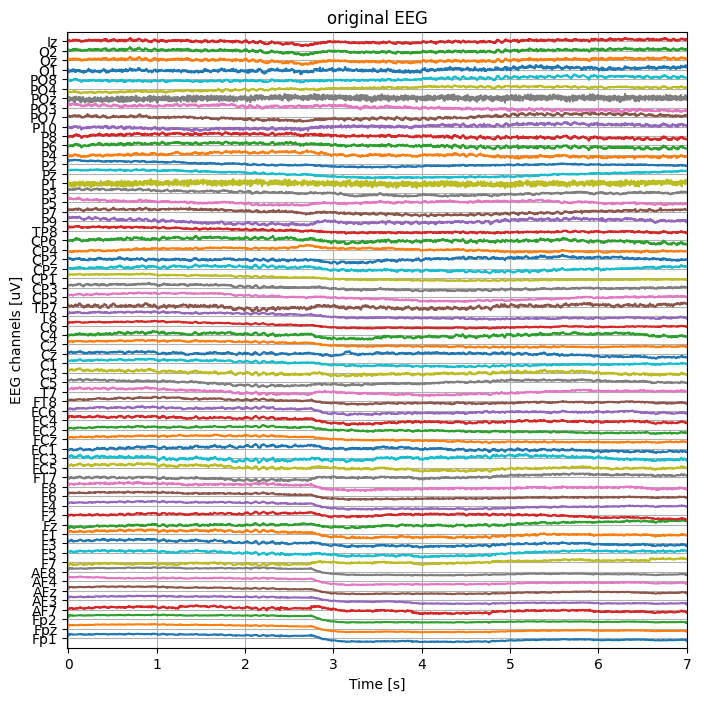

In [16]:
# Plot sample channels
trial = 0
ti = 0  # start time
tf = 7  # end time
tv = np.arange(ti, tf, 1 / new_fs)

# Raw signal
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
# Plot each channel in a shared axis

plot_eeg(X[trial], tv, ax=ax, channels=channels, title="original EEG")
plt.show()

**Exercise 2.** Discuss the preceding plot.

**Answer.** The stacked traces show the typical low-amplitude (tens of microvolts) MI EEG with a 1/f appearance—slow drifts are present but mostly stable. Channels over the sensorimotor strip (C3/C4/CPz) exhibit the most structured oscillations, while frontal/ocular leads show occasional sharp deflections that look like blinks. The vertical offsets are only for visualization; the underlying signals stay centered. Around the imagined-movement period the oscillations seem to weaken slightly, hinting at the expected mu/beta desynchronization during motor imagery.


**Note.** Discuss what brain rhythms consist of.

<p align="center"><img src="https://cdn.shopify.com/s/files/1/0348/7053/files/storage.googleapis.com-486681944373284_61cb9936-f6c2-493d-8402-3426d7f5a049_1024x1024.jpg?v=1689309340" alt="Brain rhythm bands" style="max-width:40%; width:65%;"></p>


In [17]:
# Filter full trials into brain rhythm bands using IIR filters


f_bank = np.array([[0.5, 4.0], [4.0, 8.0], [8.0, 13.0], [13.0, 32.0], [32.0, 100.0]])
vwt = np.asarray([[ti, tf]])  # 0 - 7 full trial window
tf_repr = TimeFrequencyRpr(sfreq=new_fs, f_bank=f_bank)

Xrc = np.squeeze(tf_repr.transform(X))

Xrc.shape

(199, 64, 1792, 5)

**Exercise 3.** Explain how each of the five dimensions of the Xrc array was computed.

**Answer.** `TimeFrequencyRpr.transform` builds a 5D tensor before squeezing: (1) trials/epochs from the selected MI classes, (2) EEG channels ordered as in `channels`, (3) time samples per trial after resampling to 256 Hz (≈7 s → 1792 samples), (4) time windows from `vwt` (here a single full-trial window so it collapses when squeezed), and (5) frequency bands from `f_bank` (delta, theta, alpha, beta, gamma) produced by the 5th-order Butterworth filter bank. The final `np.squeeze` removes the length-1 window axis, yielding the 4D shape reported by `Xrc.shape`.


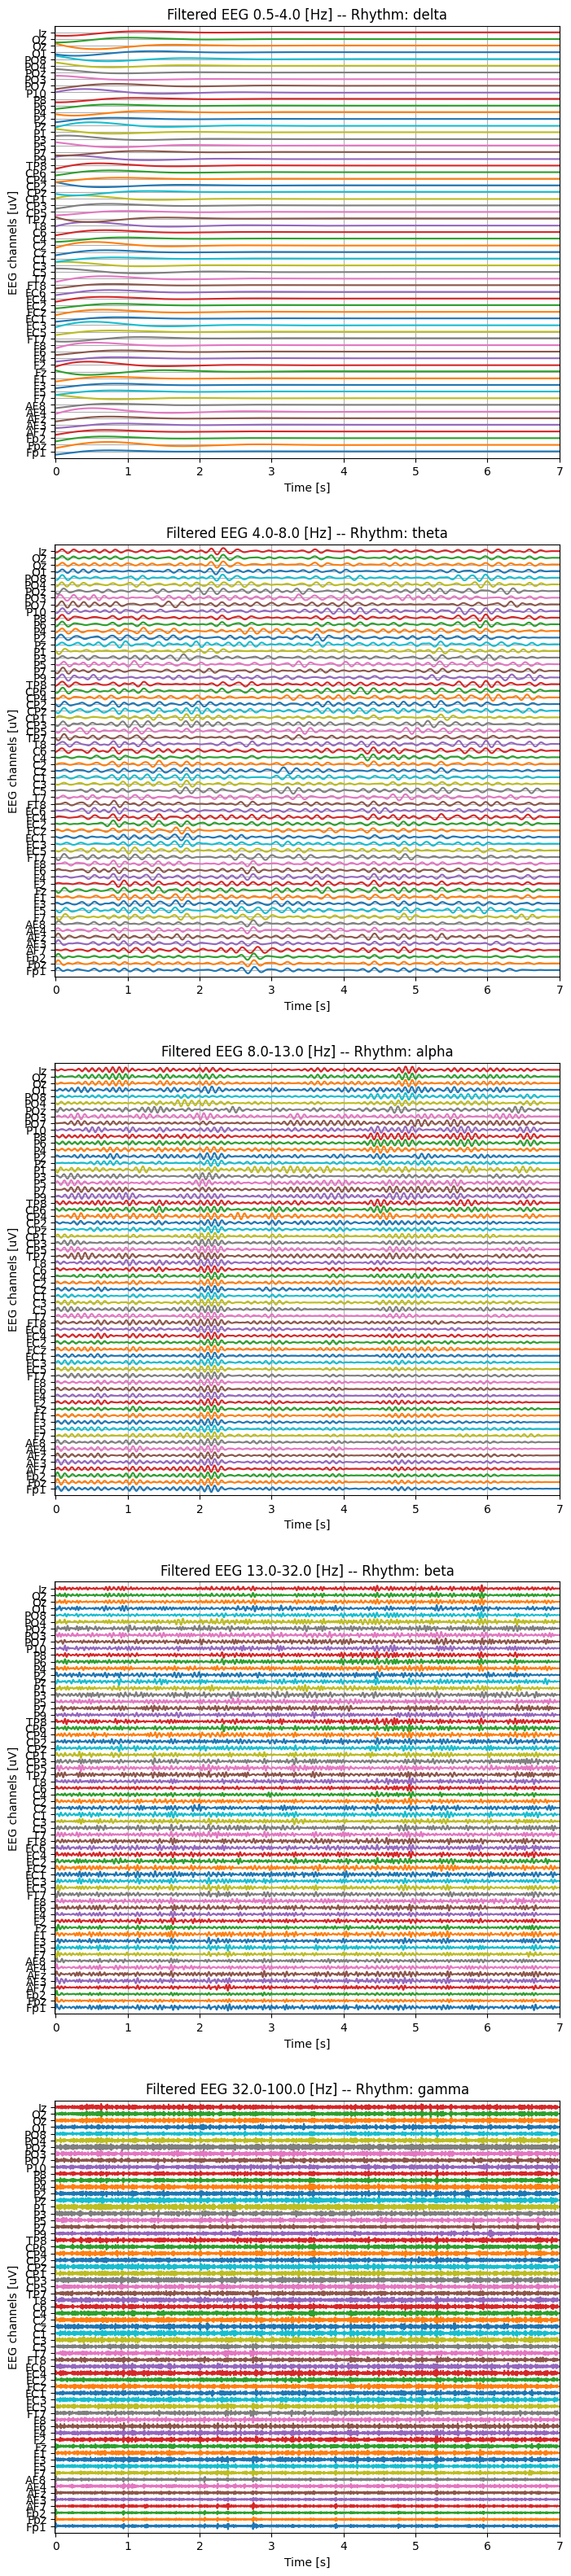

In [18]:
import matplotlib.pyplot as plt

rhythms = ["delta", "theta", "alpha", "beta", "gamma"]
trial = 0
n_trials, n_channels, n_samples, n_bands = Xrc.shape  # Data dimensions

spacing = 2  # spacing between channels
fig, ax = plt.subplots(5, 1, figsize=(8, 40))
# Plot each channel in its corresponding band
for b in range(f_bank.shape[0]):  # bands
    plot_eeg(
        Xrc[trial, :, :, b],
        tv,
        ax=ax[b],
        channels=channels,
        title=f"Filtered EEG {f_bank[b, 0]}-{f_bank[b, 1]} [Hz] -- Rhythm: {rhythms[b]}",
    )
plt.show()

**Frequency-domain visualization.** Visualize EEG signals in the frequency domain.


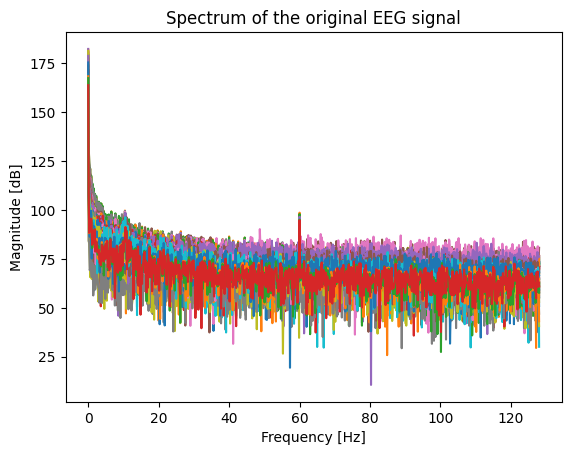

In [19]:
# original signal
Xwo = np.fft.rfft(X, axis=-1)
vfreq = np.fft.rfftfreq(X.shape[2], 1 / new_fs)

Xwo.shape
plt.plot(vfreq, 20 * np.log10(np.abs(Xwo[trial])).T)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Spectrum of the original EEG signal")
plt.show()

**Exercise 4.** Discuss the preceding plot.

**Answer.** The broadband spectrum drops roughly as 1/f, so low frequencies dominate. Peaks or shoulders around 8–13 Hz (mu) and 13–30 Hz (beta) are visible on central channels, matching motor-rhythm activity. A narrow spike near the mains frequency (50/60 Hz) would indicate line noise, and higher-frequency content rolls off sharply after ~40 Hz as expected for EEG. Differences between channels reflect how each scalp location captures different mixtures of cortical sources.


In [20]:
# Spectra of filtered signals
Xwb = np.fft.rfft(Xrc, axis=2)

Xwb.shape

(199, 64, 897, 5)

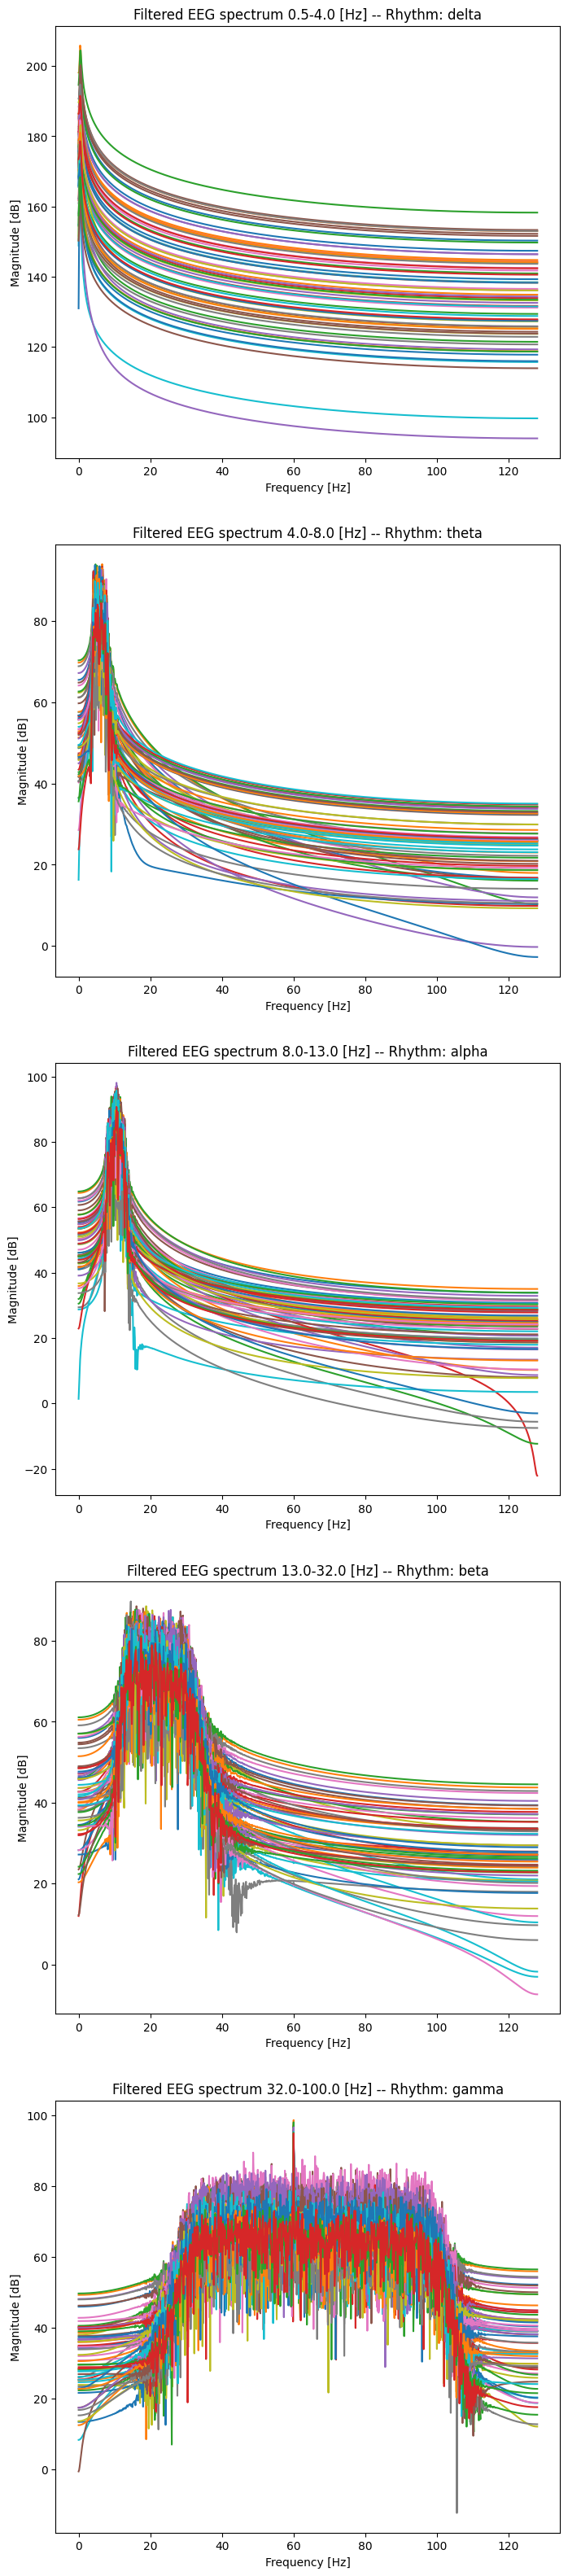

In [21]:
# Spectra of filtered signals by band (brain rhythms)

fig, ax = plt.subplots(5, 1, figsize=(8, 40))
# Plot each channel in its corresponding band
for b in range(f_bank.shape[0]):  # bands
    ax[b].plot(vfreq, 20 * np.log10(np.abs(Xwb[trial, :, :, b])).T)
    ax[b].set_xlabel("Frequency [Hz]")
    ax[b].set_ylabel("Magnitude [dB]")
    ax[b].set_title(
        f"Filtered EEG spectrum {f_bank[b, 0]}-{f_bank[b, 1]} [Hz] -- Rhythm: {rhythms[b]}"
    )

plt.show()

**Exercise 5.** Discuss the plots.

**Answer.** Each band-limited spectrum now lives almost entirely inside its design passband, with steep attenuation outside the specified edges (0.5–4, 4–8, 8–13, 13–32, 32–100 Hz). The delta/theta bands carry most of the power and show smooth low-frequency structure; alpha and beta isolate the sensorimotor rhythms of interest; gamma energy is sparse and noisier. Comparing channel curves within a band highlights which regions contribute most to that rhythm and confirms the filter bank is not leaking strongly into adjacent bands.


**Spectrograms.** Visualize spectrograms. Review what the Short-Time Fourier Transform is.


(199, 64, 65, 29)


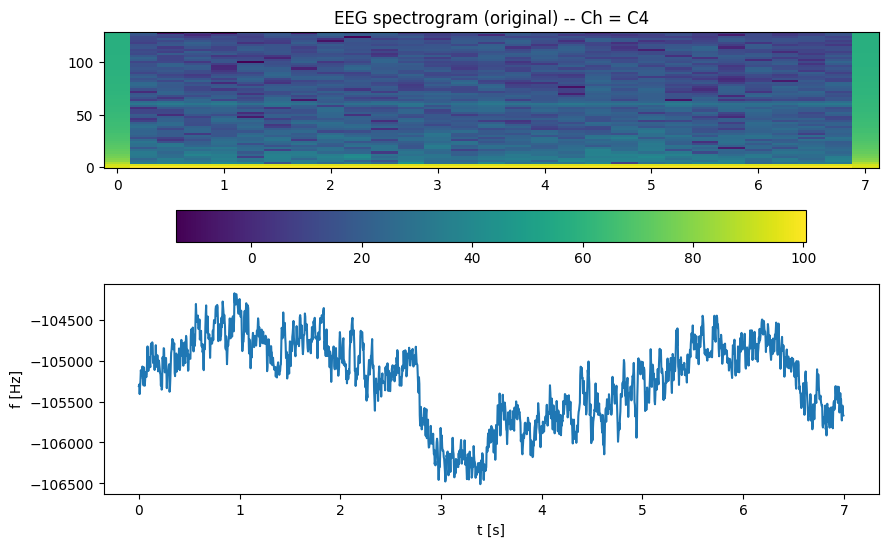

In [22]:
# Estimate STFT on the temporal axis for the original EEG
from scipy.signal import stft  #

nperseg = 0.5 * new_fs  # window length in samples
vfs, t, Xstft = stft(X, fs=new_fs, nperseg=nperseg, axis=2)
Xstft = 20 * np.log10(abs(Xstft))

# Plot STFT for one trial and one channel
trail = 0
chi = channels.index("C4")

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[1].plot(tv, X[trail, chi, :])
ax[1].set_ylabel("Amp. [uV]")
im = ax[0].pcolormesh(t, vfs, Xstft[trail, chi])
fig.colorbar(im, ax=ax[0], orientation="horizontal", pad=0.2)
plt.gca()
plt.xlabel("t [s]")
plt.ylabel("f [Hz]")
ax[0].set_title(f"EEG spectrogram (original) -- Ch = {channels[chi]}")
print(Xstft.shape)

(199, 64, 65, 5, 29)


Text(0.5, 1.0, 'EEG spectrogram (filtered 8.0-13.0 [Hz]) -- Rhythm: alpha -- Ch = C4')

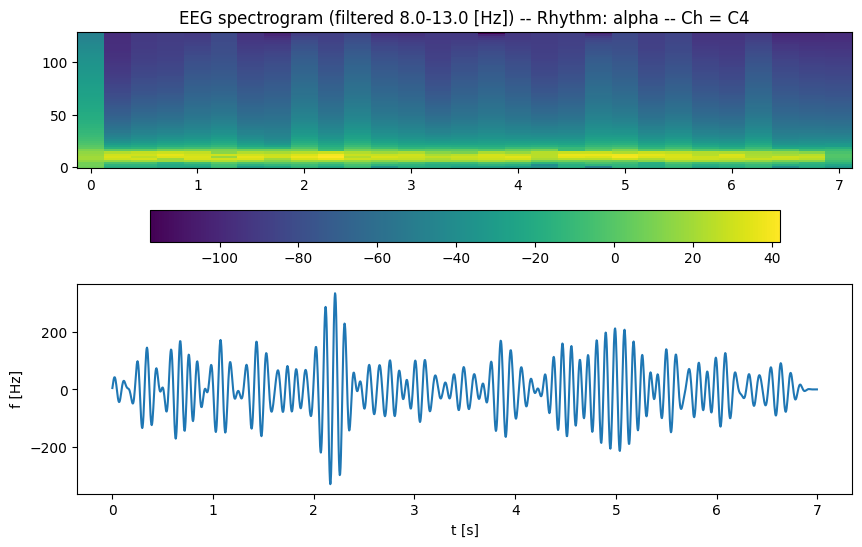

In [23]:
# Estimate STFT on the temporal axis for the filtered EEG
b = 2
vfs, t, Xstftb = stft(Xrc, fs=new_fs, nperseg=nperseg, axis=2)
Xstftb = 20 * np.log10(abs(Xstftb))

print(Xstftb.shape)


fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[1].plot(tv, Xrc[trail, chi, :, b])
ax[1].set_ylabel("Amp. [uV]")
im = ax[0].pcolormesh(t, vfs, Xstftb[trail, chi, :, b, :])
fig.colorbar(im, ax=ax[0], orientation="horizontal", pad=0.2)
plt.gca()
plt.xlabel("t [s]")
plt.ylabel("f [Hz]")
ax[0].set_title(
    f"EEG spectrogram (filtered {f_bank[b, 0]}-{f_bank[b, 1]} [Hz]) -- Rhythm: {rhythms[b]} -- Ch = {channels[chi]}"
)

**Exercise 6.** Present the STFT plots for different channels across the five brain rhythms and discuss.

**Answer.** The STFT heatmaps reveal when each rhythm is active per channel: central C3/C4 channels show a drop in 8–13 Hz and 13–30 Hz power during the MI period (event-related desynchronization), followed by partial rebound after the cue. Frontal leads keep stronger low-frequency components (delta/theta) tied to eye and movement preparation, whereas occipital channels retain alpha bursts more continuously. Scanning across channels and rhythms makes the temporal non-stationarity clear and validates the chosen window length (`nperseg`) for balancing time vs. frequency resolution.


**10–20 montage visualization.** Visualize EEG signals on the 10-20 montage.


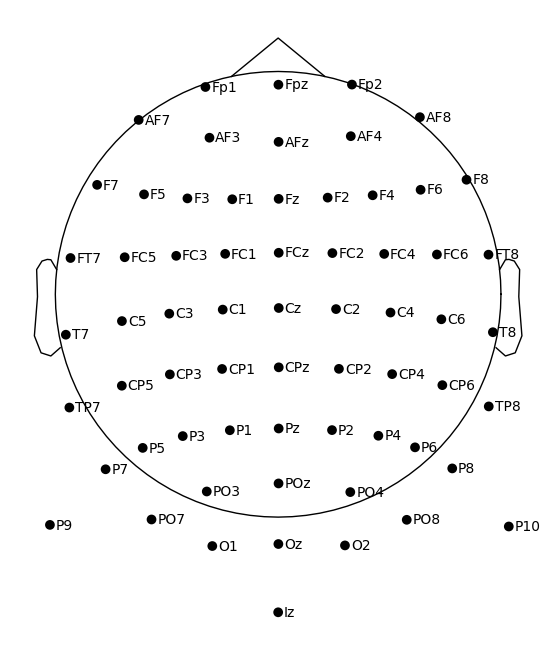

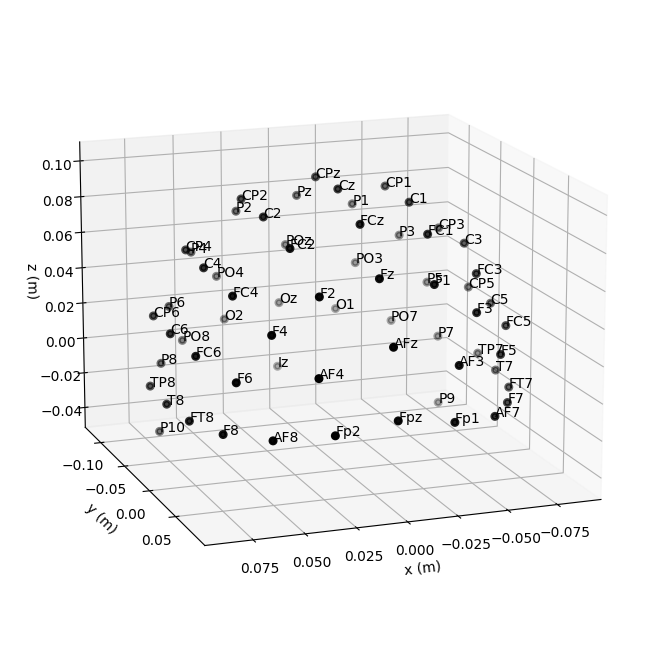

In [24]:
import mne

# Load the standard montage
easycap_montage = mne.channels.make_standard_montage("standard_1020")


# Build a custom montage with the selected electrodes
custom_pos = {ch: easycap_montage.get_positions()["ch_pos"][ch] for ch in channels}
custom_montage = mne.channels.make_dig_montage(ch_pos=custom_pos, coord_frame="head")

# Show the custom montage
custom_montage.plot(show_names=True)
fig = custom_montage.plot(kind="3d", show_names=True, show=False)
fig.gca().view_init(azim=70, elev=15)  # Adjust 3D view

In [25]:
%%capture
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.visualizations.git


**Topographic maps.**


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


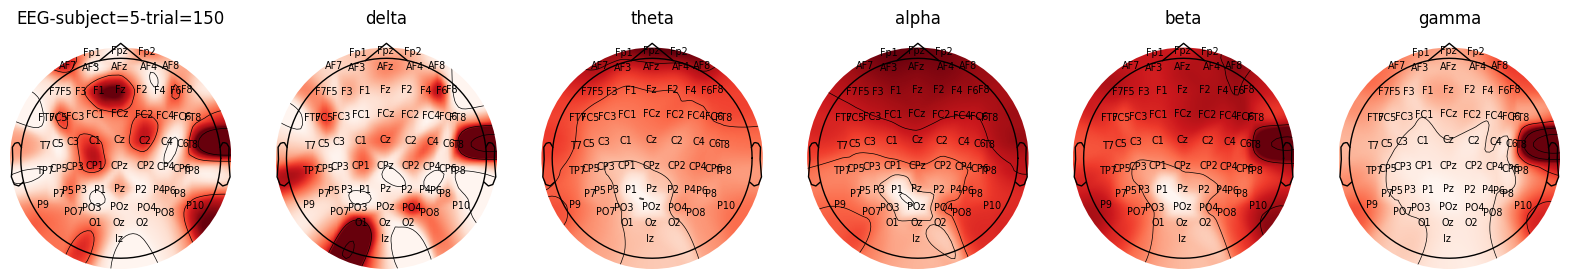

In [26]:
from gcpds.visualizations.topoplots import topoplot


trial = 150
vec_topo_o = abs(X[trial, :]).mean(axis=-1)
vec_topo_b = abs(Xrc[trial, :, :, :]).mean(axis=1)


fig, ax = plt.subplots(1, 6, figsize=(20, 10))
topoplot(
    vec_topo_o,
    channels,
    contours=3,
    cmap="Reds",
    names=channels,
    sensors=False,
    ax=ax[0],
    show=False,
    vlim=(min(vec_topo_o), max(vec_topo_o)),
)

for b in range(f_bank.shape[0]):
    vec_ = vec_topo_b[:, b]
    topoplot(
        vec_,
        channels,
        contours=3,
        cmap="Reds",
        names=channels,
        sensors=False,
        ax=ax[b + 1],
        show=False,
        vlim=(min(vec_), max(vec_)),
    )
    ax[b + 1].set_title(rhythms[b])

ax[0].set_title(f"EEG-subject={sbj}-trial={trial}")

plt.show()

**Exercise 7.** Discuss.

**Answer.** The topographic maps compress the spatial structure: the raw-power map highlights posterior alpha and frontal eye-related activity, while rhythm-specific maps emphasize sensorimotor areas. Alpha/beta maps typically show a lateralized dip over the contralateral motor cortex during imagined movement, consistent with ERD. Higher-beta/gamma maps are flatter and noisier. The spatial concentration of power guides which electrodes to prioritize and whether re-referencing or CSP is focusing on meaningful cortical regions rather than artifacts.


**Common Spatial Patterns.** Investigate what Common Spatial Patterns (CSP) are and their application to EEG signal processing.


In [27]:
import mne
from mne.decoding import CSP

# CSP object
n_components = 2
csp = CSP(n_components=n_components, log=True, transform_into="average_power")
# Fit and transform the data
csp_data = csp.fit_transform(X.astype(np.float64), y)

CSP Transformed Shape: (199, 2)


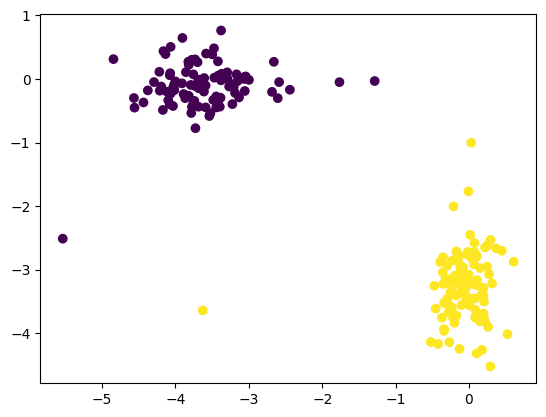

In [28]:
print("CSP Transformed Shape:", csp_data.shape)
plt.scatter(csp_data[:, 0], csp_data[:, 1], c=y)
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


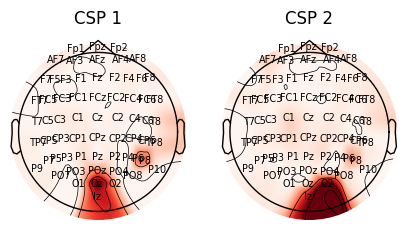

In [29]:
# Original EEG
fig, ax = plt.subplots(1, n_components, figsize=(5, 5))
for cc in range(n_components):
    vec_ = np.abs(csp.filters_[cc])
    topoplot(
        vec_,
        channels,
        contours=3,
        cmap="Reds",
        names=channels,
        sensors=False,
        ax=ax[cc],
        show=False,
        vlim=(min(vec_), max(vec_)),
    )
    ax[cc].set_title(f"CSP {cc + 1}")


In [30]:
# Data loading for another subject
sbj = 14
X, y = load_GIGA(sbj=sbj, **load_args)

f_bank = np.array([[0.5, 4.0], [4.0, 8.0], [8.0, 13.0], [13.0, 32.0], [32.0, 100.0]])
vwt = np.array(
    [[0.25, 1.75], [1.5, 3], [2.75, 4.25], [4, 5.5], [5.25, 6.75]]
)  # 0–7 s full trial windows

tf_repr = TimeFrequencyRpr(sfreq=new_fs, f_bank=f_bank, vwt=vwt)
X_ = np.squeeze(tf_repr.transform(X))
X_.shape

Resampling from 512.000000 to 256.000000 Hz.


(200, 64, 384, 5, 5)

In [31]:
# CSP across windows and rhythms
# Define array dimensions
n_rhythms = f_bank.shape[0]
n_windows = vwt.shape[0]
n_comp = 2
# Initialize empty collection with nested lists
csp_M = [[None for _ in range(n_windows)] for _ in range(n_rhythms)]
csp_filters_ = np.zeros(
    (n_rhythms, n_windows, X_.shape[1], X_.shape[1])
)  # rhythms x windows x channels x channels
Xcsp_ = np.zeros((X_.shape[0], n_comp, n_rhythms, n_windows))

for i in range(n_rhythms):
    for j in range(n_windows):
        print(f"CSP rhythm {f_bank[i]} -- window {vwt[j]}...")
        csp_M[i][j] = CSP(n_components=n_comp, log=True, transform_into="average_power")
        Xcsp_[:, :, i, j] = csp.fit_transform(X_[:, :, :, j, i].astype(np.float64), y)
        csp_filters_[i, j, :] = np.abs(csp.filters_)

CSP rhythm [0.5 4. ] -- window [0.25 1.75]...
CSP rhythm [0.5 4. ] -- window [1.5 3. ]...
CSP rhythm [0.5 4. ] -- window [2.75 4.25]...
CSP rhythm [0.5 4. ] -- window [4.  5.5]...
CSP rhythm [0.5 4. ] -- window [5.25 6.75]...
CSP rhythm [4. 8.] -- window [0.25 1.75]...
CSP rhythm [4. 8.] -- window [1.5 3. ]...
CSP rhythm [4. 8.] -- window [2.75 4.25]...
CSP rhythm [4. 8.] -- window [4.  5.5]...
CSP rhythm [4. 8.] -- window [5.25 6.75]...
CSP rhythm [ 8. 13.] -- window [0.25 1.75]...
CSP rhythm [ 8. 13.] -- window [1.5 3. ]...
CSP rhythm [ 8. 13.] -- window [2.75 4.25]...
CSP rhythm [ 8. 13.] -- window [4.  5.5]...
CSP rhythm [ 8. 13.] -- window [5.25 6.75]...
CSP rhythm [13. 32.] -- window [0.25 1.75]...
CSP rhythm [13. 32.] -- window [1.5 3. ]...
CSP rhythm [13. 32.] -- window [2.75 4.25]...
CSP rhythm [13. 32.] -- window [4.  5.5]...
CSP rhythm [13. 32.] -- window [5.25 6.75]...
CSP rhythm [ 32. 100.] -- window [0.25 1.75]...
CSP rhythm [ 32. 100.] -- window [1.5 3. ]...
CSP rhythm [

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


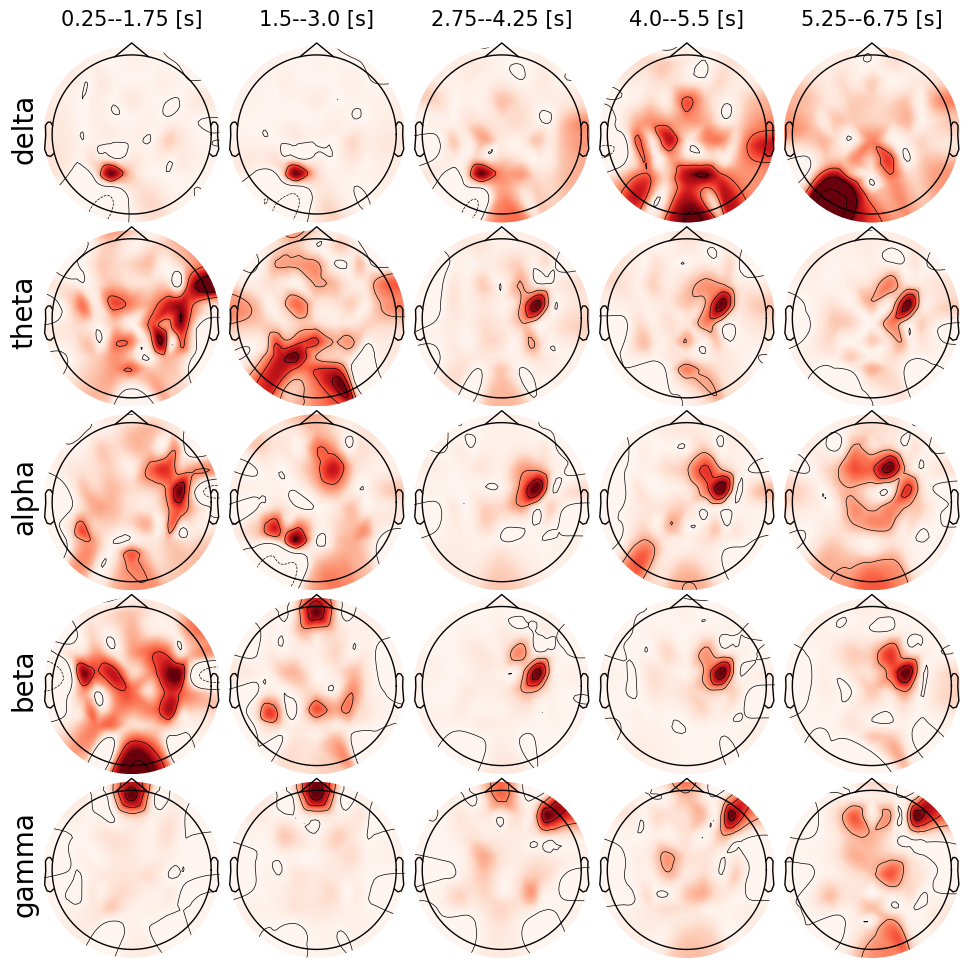

In [32]:
# Plot topomaps across rhythms and windows
fig, ax = plt.subplots(n_rhythms, n_windows, figsize=(12, 12))

for i in range(n_rhythms):
    for j in range(n_windows):
        vec_ = csp_filters_[i, j, 0]
        vec_ = vec_ / max(vec_)
        topoplot(
            vec_,
            channels,
            contours=3,
            cmap="Reds",
            names=None,
            sensors=False,
            ax=ax[i, j],
            show=False,
            vlim=(min(vec_), max(vec_)),
        )
    ax[i, 0].set_ylabel(rhythms[i], fontsize=20)
for j in range(n_windows):
    ax[0, j].set_title(f"{vwt[j, 0]}--{vwt[j, 1]} [s]", fontsize=15)

plt.subplots_adjust(hspace=-0.025, wspace=-0.025)
plt.show()

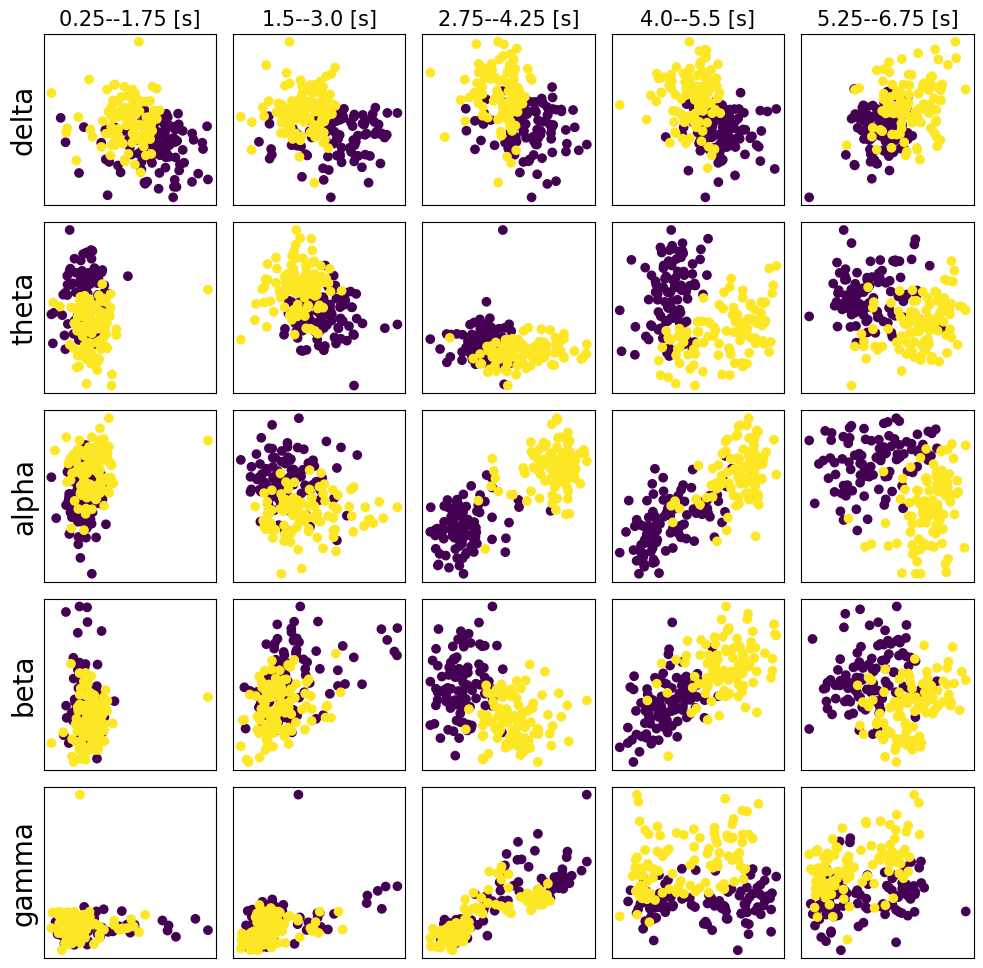

In [33]:
# Scatter plots of CSP features across rhythms and windows
fig, ax = plt.subplots(n_rhythms, n_windows, figsize=(12, 12))

for i in range(n_rhythms):
    for j in range(n_windows):
        ax[i, j].scatter(Xcsp_[:, 0, i, j], Xcsp_[:, 1, i, j], c=y)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
    ax[i, 0].set_ylabel(rhythms[i], fontsize=20)
for j in range(n_windows):
    ax[0, j].set_title(f"{vwt[j, 0]}--{vwt[j, 1]} [s]", fontsize=15)

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()